# Data on Language at work from the Federal Office of Statistics

source: https://opendata.swiss/en/dataset/die-ublicherweise-bei-der-arbeit-gesprochenen-sprachen1

### Extract and clean up data from the Excel file

In [6]:
import os
import pandas as pd

base_dir = os.getcwd() 

excel_file_path = os.path.join(os.getcwd(), "raw_data", "su-d-01.08.01.03.xlsx")

xlsx = pd.ExcelFile(excel_file_path)

dfs = {}

for sheet_name in xlsx.sheet_names:
    dfs[sheet_name] = pd.read_excel(excel_file_path, sheet_name=sheet_name)

    # data clean-up
    dfs[sheet_name] = dfs[sheet_name].drop([0,1,2,3])    # drop empty rows at top
    dfs[sheet_name] = dfs[sheet_name].drop(index=range(16,25))  # drop empty rows at bottom
    dfs[sheet_name] = dfs[sheet_name].drop(dfs[sheet_name].columns[0], axis=1)    # delete empty or irrelevant columns
    dfs[sheet_name] = dfs[sheet_name].drop(dfs[sheet_name].columns[2], axis=1)
    dfs[sheet_name] = dfs[sheet_name].drop(dfs[sheet_name].columns[3], axis=1)
    dfs[sheet_name].columns = ["Language", "Number of speakers", "Percentage of workforce"]   # rename columns
    dfs[sheet_name] = dfs[sheet_name].reset_index(drop=True)


# Combine all dataframes into one and reshape to facilitate plotting
combined = []

for year, df in dfs.items():
    temp = df.copy()
    temp['Year'] = year
    combined.append(temp)

complete_df = pd.concat(combined, ignore_index=True)

pivoted_df = complete_df.pivot(index="Year", columns="Language", values="Number of speakers")
pivoted_df_percentages = complete_df.pivot(index="Year", columns="Language", values="Percentage of workforce")

# Find the column name that starts with "Auskunft"
col_to_drop = [col for col in pivoted_df.columns if col.startswith("Auskunft")]
col_to_drop = [col for col in pivoted_df_percentages.columns if col.startswith("Auskunft")]

# Drop it if found
pivoted_df = pivoted_df.drop(columns=col_to_drop)
pivoted_df_percentages = pivoted_df_percentages.drop(columns=col_to_drop)

# Rename columns for convenience
pivoted_df.columns = ['ALBANIAN','AOTHER','ENGLISH','FRENCH','HIGH GERMAN','ITALIAN','PORTUGUESE','RAETO','SWISS GERMAN','SERBIAN','SPANISH','TICINO']
pivoted_df_percentages.columns = ['ALBANIAN','AOTHER','ENGLISH','FRENCH','HIGH GERMAN','ITALIAN','PORTUGUESE','RAETO','SWISS GERMAN','SERBIAN','SPANISH','TICINO']

In [2]:
# check the results

pivoted_df.info()
pivoted_df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 2010 to 2023
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ALBANIAN      14 non-null     object
 1   AOTHER        14 non-null     object
 2   ENGLISH       14 non-null     object
 3   FRENCH        14 non-null     object
 4   HIGH GERMAN   14 non-null     object
 5   ITALIAN       14 non-null     object
 6   PORTUGUESE    14 non-null     object
 7   RAETO         14 non-null     object
 8   SWISS GERMAN  14 non-null     object
 9   SERBIAN       14 non-null     object
 10  SPANISH       14 non-null     object
 11  TICINO        14 non-null     object
dtypes: object(12)
memory usage: 1.4+ KB


,ALBANIAN,AOTHER,ENGLISH,FRENCH,HIGH GERMAN,ITALIAN,PORTUGUESE,RAETO,SWISS GERMAN,SERBIAN,SPANISH,TICINO
Year,,,,,,,,,,,,
2010,28303.107865,60102.743543,678114.923871,1195820.362268,1330123.225346,355574.251564,68345.127979,16928.695373,2754248.993732,33656.455369,79406.062044,45663.411371
2011,27901.051667,58756.716616,712996.62108,1194981.927045,1342536.122682,359116.752218,71459.395592,14343.238491,2751387.079286,33175.830889,81557.894343,44177.819031
2012,30353.4375,60031.11982,736323.95866,1213491.960019,1364277.306607,360580.191997,73950.966047,14901.120485,2753924.252381,35479.744714,88794.143052,44262.04593
2013,29534.212098,63918.410985,775768.551323,1237475.196355,1422416.041543,369295.810629,77386.396997,14722.687419,2810416.044858,34579.670015,95988.692151,45678.467616
2014,31970.036621,68407.520666,811616.673782,1267276.518365,1473002.308859,375870.671232,79337.818446,16363.231491,2846278.557576,33818.734375,95331.590847,43641.260232


### Cleaned up data :

In [9]:
clean_data = pivoted_df
clean_data_percentages = pivoted_df_percentages
print(clean_data)
print(clean_data_percentages)

          ALBANIAN        AOTHER         ENGLISH          FRENCH  \
Year                                                               
2010  28303.107865  60102.743543   678114.923871  1195820.362268   
2011  27901.051667  58756.716616    712996.62108  1194981.927045   
2012    30353.4375   60031.11982    736323.95866  1213491.960019   
2013  29534.212098  63918.410985   775768.551323  1237475.196355   
2014  31970.036621  68407.520666   811616.673782  1267276.518365   
2015  33394.825528  71029.135166   830010.528404  1270137.898368   
2016  36169.286771  72457.124297   870959.549639  1278777.445197   
2017  38698.196769  75588.776835   902804.895669  1290511.531798   
2018   33619.27539  70725.631546   872226.294424  1244724.723086   
2019  38451.263709  68576.302935     902900.6548  1233633.033144   
2020  35248.371637  66384.507532    887154.41826  1200477.770548   
2021  38244.696955  72168.138794   940445.310081  1226770.699281   
2022  40513.237371  78101.836415  1014345.225868

### Plot the data

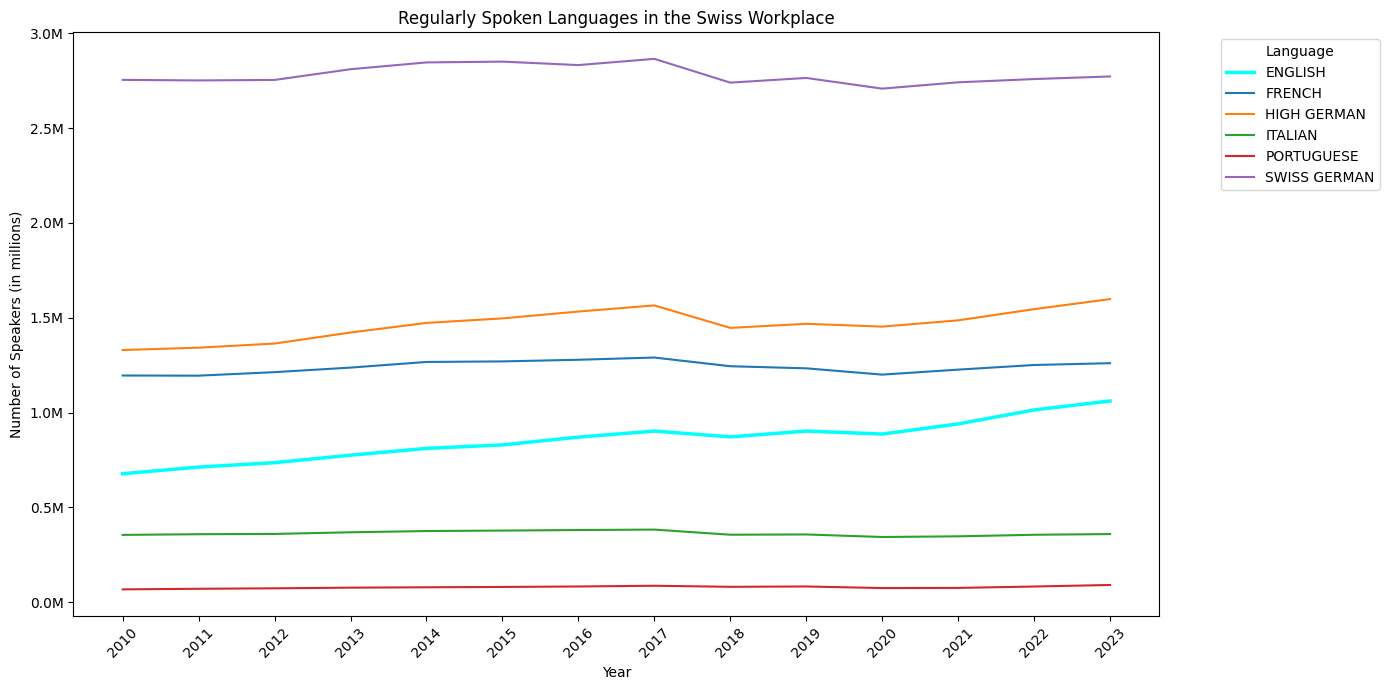

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Ensure the index is of string type for clean labeling
clean_data.index = clean_data.index.astype(str)

selected_columns = ['ENGLISH','FRENCH','HIGH GERMAN','ITALIAN','PORTUGUESE','SWISS GERMAN']

plt.figure(figsize=(14, 7))

# Plot each language as a line
for column in selected_columns:
    if column == 'ENGLISH':
        plt.plot(clean_data.index, clean_data[column], label="ENGLISH", color='#00FFFF', linewidth=2.5)  # Bright cyan
    else:
        plt.plot(clean_data.index, clean_data[column], label=column)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set y-axis tick interval to 0.5 million
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500_000))

# Format ticks to show in millions (e.g., 0.5M, 1.0M)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1_000_000:.1f}M'))

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Number of Speakers (in millions)")
plt.title("Regularly Spoken Languages in the Swiss Workplace")
plt.legend(title="Language", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
